### Cześć podstawowa

In [63]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import numpy as np

# Odczytanie danych

df = pd.read_csv('data6.tsv', sep='\t', names=['X', 'Y'])
X = df["X"]
Y = df['Y']

# Implementacja regresji wielomianowej 2, 3 i 5 stopnia

drugi_stopien = PolynomialFeatures(degree=2, include_bias=False)
trzeci_stopien = PolynomialFeatures(degree=3, include_bias=False)
piaty_stopien = PolynomialFeatures(degree=5, include_bias=False)

# Zmiana wartości X na regresję wielomianową

X_drugi = drugi_stopien.fit_transform(X.to_numpy().reshape(-1,1))
X_trzeci = trzeci_stopien.fit_transform(X.to_numpy().reshape(-1,1))
X_piaty = piaty_stopien.fit_transform(X.to_numpy().reshape(-1,1))

model_dwu = LinearRegression()
model_trzy = LinearRegression()
model_piec = LinearRegression()
regularyzacja = Ridge(alpha=100)

# Nauczenie modelu regresji liniowej na podstawie wielomianów

model_dwu.fit(X_drugi, Y)
model_trzy.fit(X_trzeci, Y)
model_piec.fit(X_piaty,Y)
regularyzacja.fit(X_piaty, Y)

# Predykcja wyników

y_pred_dwu = model_dwu.predict(X_drugi)
y_pred_trzy = model_trzy.predict(X_trzeci)
y_pred_piec = model_piec.predict(X_piaty)
y_pred_reg = regularyzacja.predict(X_piaty)

c:\Users\szkud\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.17475e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Przedstawienie regresji na wykresie

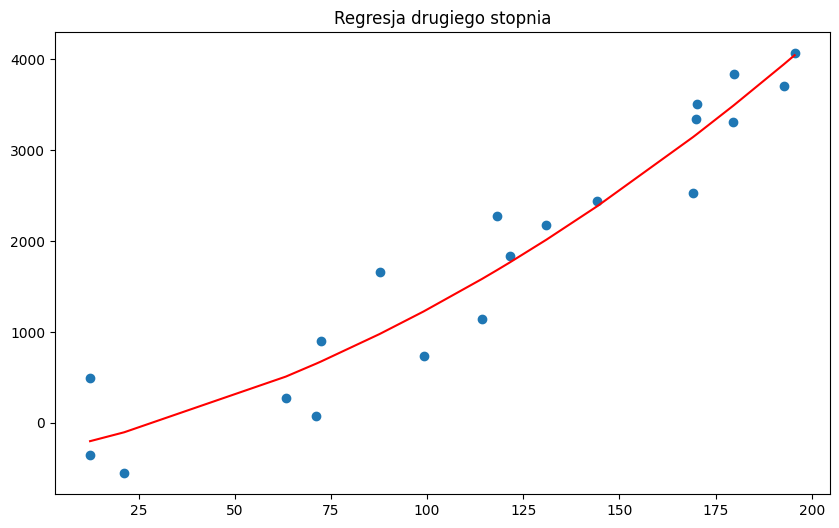

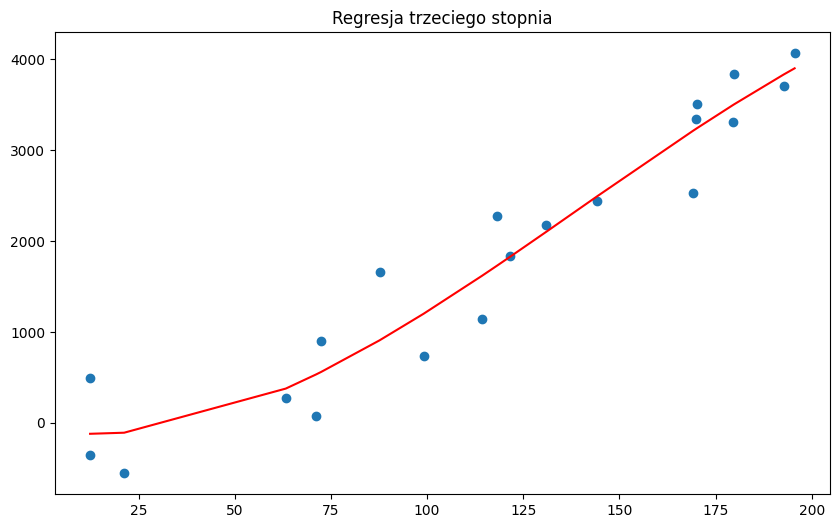

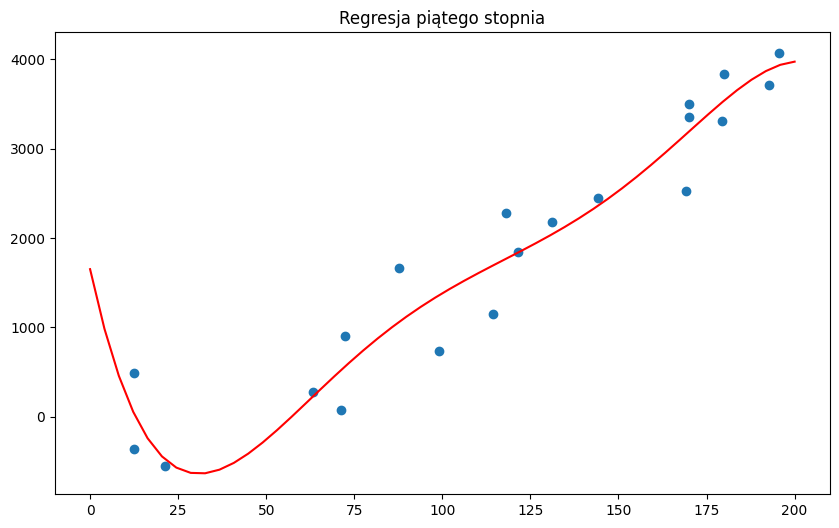

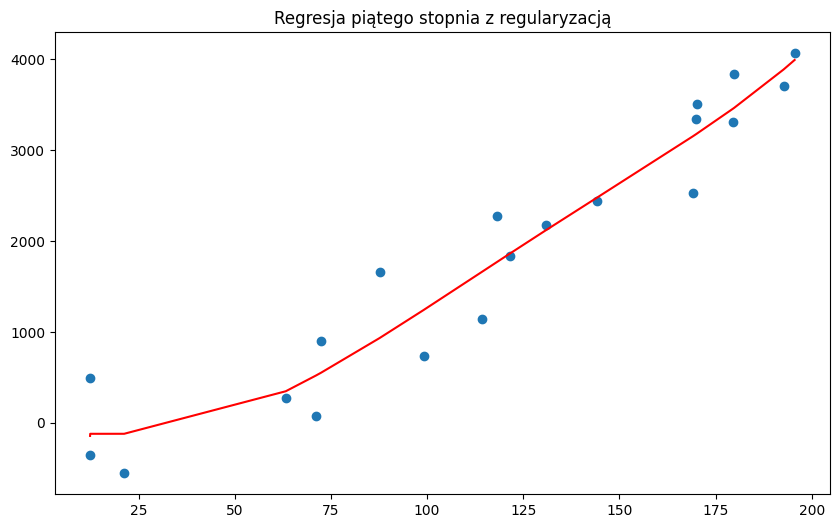

In [64]:
plt.figure(figsize=(10, 6))
plt.title("Regresja drugiego stopnia")
plt.scatter(X,Y)
plt.plot(sorted(X), sorted(y_pred_dwu), c='red')
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Regresja trzeciego stopnia")
plt.scatter(X,Y)
plt.plot(sorted(X), sorted(y_pred_trzy), c='red')
plt.show()


x_plot = np.linspace(0,200).reshape(-1,1)
y_plot = model_piec.predict(piaty_stopien.fit_transform(x_plot))
plt.figure(figsize=(10, 6))
plt.title("Regresja piątego stopnia")
plt.scatter(X,Y)
plt.plot(x_plot,y_plot, c='red')
plt.show()

plt.figure(figsize=(10, 6))
plt.title("Regresja piątego stopnia z regularyzacją")
plt.scatter(X,Y)
plt.plot(sorted(X), sorted(y_pred_reg), c='red')
plt.show()